In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras 
%matplotlib inline

In [8]:
(X_train,y_train),(X_test,y_test)=tf.keras.datasets.cifar10.load_data()

In [9]:
X_train.shape

(50000, 32, 32, 3)

In [10]:
y_train.shape

(50000, 1)

In [11]:
X_test.shape

(10000, 32, 32, 3)

In [18]:
y_train[1][0]

9

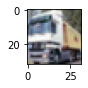

In [16]:
plt.figure(figsize = (10,1))
plt.imshow(X_train[1])

In [13]:
y_train[1]

array([9], dtype=uint8)

In [19]:
y_train[1][0]

9

In [20]:
X_train[1]

array([[[0.60392157, 0.69411765, 0.73333333],
        [0.49411765, 0.5372549 , 0.53333333],
        [0.41176471, 0.40784314, 0.37254902],
        ...,
        [0.35686275, 0.37254902, 0.27843137],
        [0.34117647, 0.35294118, 0.27843137],
        [0.30980392, 0.31764706, 0.2745098 ]],

       [[0.54901961, 0.62745098, 0.6627451 ],
        [0.56862745, 0.6       , 0.60392157],
        [0.49019608, 0.49019608, 0.4627451 ],
        ...,
        [0.37647059, 0.38823529, 0.30588235],
        [0.30196078, 0.31372549, 0.24313725],
        [0.27843137, 0.28627451, 0.23921569]],

       [[0.54901961, 0.60784314, 0.64313725],
        [0.54509804, 0.57254902, 0.58431373],
        [0.45098039, 0.45098039, 0.43921569],
        ...,
        [0.30980392, 0.32156863, 0.25098039],
        [0.26666667, 0.2745098 , 0.21568627],
        [0.2627451 , 0.27058824, 0.21568627]],

       ...,

       [[0.68627451, 0.65490196, 0.65098039],
        [0.61176471, 0.60392157, 0.62745098],
        [0.60392157, 0

In [14]:
#scaling
X_train=X_train/255
X_test=X_test/255

In [21]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [22]:
classes[y_train[1][0]]

'truck'

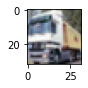

In [24]:
plt.figure(figsize = (10,1))
plt.imshow(X_train[1])

In [26]:
y_train1=keras.utils.to_categorical(y_train,num_classes=10,dtype='float32')
y_test1=keras.utils.to_categorical(y_test,num_classes=10,dtype='float32')

In [30]:
y_train[1][0]

9

In [28]:
y_train1[1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [35]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32, 3)),
    keras.layers.Dense(1000,activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(500,activation='relu'),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])

model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model.fit(X_train,y_train1,epochs=2)

Epoch 1/2
1563/1563 [==============================] - 40s 25ms/step - loss: 2.0573 - accuracy: 0.2267
Epoch 2/2
1563/1563 [==============================] - 39s 25ms/step - loss: 1.9074 - accuracy: 0.2891


In [36]:
model.evaluate(X_test,y_test1)

313/313 [==============================] - 3s 9ms/step - loss: 1.8399 - accuracy: 0.3419


[1.8399238586425781, 0.3418999910354614]

In [37]:
pred=model.predict(X_test)

313/313 [==============================] - 3s 8ms/step


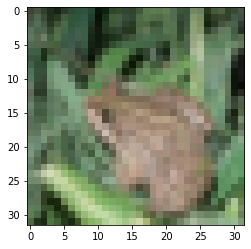

In [48]:
plt.imshow(X_test[4])

In [50]:
pred[4]

array([0.03206691, 0.03337221, 0.1588087 , 0.09620134, 0.1908471 ,
       0.1129692 , 0.21600366, 0.11973486, 0.0121549 , 0.02784115],
      dtype=float32)

In [51]:
classes[np.argmax(pred[4])]

'frog'

In [52]:
pred1=[np.argmax(i) for i in pred]

In [55]:
import math
cm=tf.math.confusion_matrix(y_test,pred1)

Text(33.0, 0.5, 'truth')

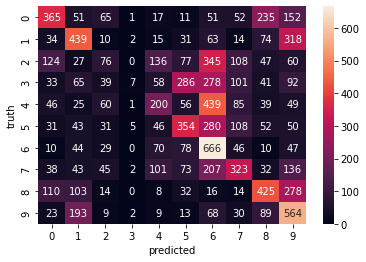

In [56]:
import seaborn as sns
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('predicted')
plt.ylabel('truth')


In [58]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred1))

              precision    recall  f1-score   support

           0       0.45      0.36      0.40      1000
           1       0.42      0.44      0.43      1000
           2       0.20      0.08      0.11      1000
           3       0.35      0.01      0.01      1000
           4       0.30      0.20      0.24      1000
           5       0.35      0.35      0.35      1000
           6       0.28      0.67      0.39      1000
           7       0.37      0.32      0.34      1000
           8       0.41      0.42      0.42      1000
           9       0.32      0.56      0.41      1000

    accuracy                           0.34     10000
   macro avg       0.35      0.34      0.31     10000
weighted avg       0.35      0.34      0.31     10000

